In [1]:
import gensim 

In [2]:
import pandas as pd

In [3]:
wiki_data = pd.read_csv('data/wikipedia/cleaned_wiki_data_full_text_chunks.csv')

In [4]:
len(wiki_data)

152895

In [5]:
wiki_data = wiki_data[wiki_data.text.apply(lambda x: len(x) > 500)]

In [6]:
def read_corpus(list_of_docs, tokens_only=False):
    for i, line in enumerate(list_of_docs):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [7]:
removed_duplicates = wiki_data.text.drop_duplicates()

In [8]:
len(removed_duplicates)

68415

In [9]:
train_corpus = list(read_corpus(removed_duplicates))
test_corpus = list(read_corpus(removed_duplicates, tokens_only=True))

In [ ]:
for vector_size in [300]:
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size, min_count=10, epochs=50, workers=4)
    print(vector_size)
    model.build_vocab(train_corpus)
    model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
    print(vector_size, 'done')
    model.save('models/simple_wiki_chunked_word_limited_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_' + str(50))

300


In [165]:
epochs = 50

while epochs < 1000:
    epochs += 50
    model.train(train_corpus, total_examples=model.corpus_count, epochs=50)
    model.save('models/simple_wiki_chunked_word_limited_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_'+str(epochs))
    print(epochs)

100


KeyboardInterrupt: 

In [192]:
while epochs < 1000:
    epochs += 20
    model.train(train_corpus, total_examples=model.corpus_count, epochs=20)
    model.save('models/simple_wiki_chunked_word_limited_doc2vec_' + str(vector_size) + '_vector_10_min_word_epoch_'+str(epochs))
    print(epochs)

190
210
230
250
270
290
310
330
350
370
390
410
430
450
470
490
510
530
550
570
590
610
630
650
670
690
710
730
750
770
790
810
830
850
870
890
910
930
950
970
990
1010


In [10]:
import gensim

In [13]:
del train_corpus

# Looking at the consistency of these things

In [14]:
topics = ['The domestic cat is a small, typically furry, carnivorous mammal. They are often called house cats[5] when kept as indoor pets or simply cats when there is no need to distinguish them from other felids and felines. They are often valued by humans for companionship and for their ability to hunt vermin. There are more than seventy cat breeds recognized by various cat registries.',
          "Association football, more commonly known as football or soccer,[a] is a team sport played between two teams of eleven players with a spherical ball. It is played by 250 million players in over 200 countries and dependencies, making it the world's most popular sport.[5][6][7][8] The game is played on a rectangular field with a goal at each end. The object of the game is to score by moving the ball beyond the goal line into the opposing goal.",
         "Amazon.com Inc said on Tuesday it would raise its minimum wage to $15 per hour for U.S. employees from next month, giving ground to critics of poor pay and working conditions at the world’s second most valuable company.",
         " France said on Tuesday there was no doubt Iran’s intelligence ministry was behind a June plot to attack an exiled opposition group’s rally outside Paris and it seized assets belonging to Tehran’s intelligence services and two Iranian nationals."]

In [15]:
# topics = ['I love my mother she enjoys running and walking. She dreams of running a marathon one day.']

In [16]:
# topics = ["Breakfast is typically the first meal of a day, most often eaten in the early morning before undertaking the day's work.[1] The word in English refers to breaking the fasting period of the prior night.[2] There is a strong tendency for one or more 'typical', or 'traditional', breakfast menus to exist in most places, but the composition of this varies widely from place to place, and has varied over time, so that globally a very wide range of preparations and ingredients are now associated with breakfast."]

In [17]:
from gensim.utils import simple_preprocess

In [26]:
simple_preprocess(topics[2])

['amazon',
 'com',
 'inc',
 'said',
 'on',
 'tuesday',
 'it',
 'would',
 'raise',
 'its',
 'minimum',
 'wage',
 'to',
 'per',
 'hour',
 'for',
 'employees',
 'from',
 'next',
 'month',
 'giving',
 'ground',
 'to',
 'critics',
 'of',
 'poor',
 'pay',
 'and',
 'working',
 'conditions',
 'at',
 'the',
 'world',
 'second',
 'most',
 'valuable',
 'company']

In [19]:
model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_word_limited_doc2vec_300_vector_10_min_word_epoch_770')


In [20]:
vector = model.infer_vector(simple_preprocess(topics[2]), epochs=2000)
model.docvecs.most_similar([vector])

/home/wmvoje/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(68117, 0.33887067437171936),
 (65584, 0.30545514822006226),
 (21819, 0.30079221725463867),
 (25688, 0.29926803708076477),
 (61617, 0.29873985052108765),
 (36396, 0.29786285758018494),
 (48636, 0.29580384492874146),
 (21846, 0.29414331912994385),
 (21831, 0.287744402885437),
 (21525, 0.2833746671676636)]

In [27]:
vector = model.infer_vector(test_corpus[1], epochs=2000)
model.docvecs.most_similar([vector])



/home/wmvoje/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(1, 0.8489087224006653),
 (417, 0.48484891653060913),
 (636, 0.4844936728477478),
 (362, 0.4770244359970093),
 (360, 0.4720984995365143),
 (521, 0.45553529262542725),
 (361, 0.45523908734321594),
 (520, 0.4535221755504608),
 (0, 0.4504185616970062),
 (500, 0.4459006190299988)]

In [29]:
test_corpus[636]

['in',
 'the',
 'old',
 'roman',
 'calendar',
 'september',
 'was',
 'the',
 'seven',
 'seventh',
 'month',
 'which',
 'is',
 'where',
 'it',
 'got',
 'its',
 'name',
 'with',
 'julius',
 'caesar',
 'calendar',
 'reform',
 'september',
 'became',
 'the',
 'ninth',
 'month',
 'with',
 'days',
 'september',
 'comes',
 'after',
 'august',
 'and',
 'before',
 'october',
 'september',
 'begins',
 'on',
 'the',
 'same',
 'day',
 'of',
 'week',
 'as',
 'december',
 'every',
 'year',
 'as',
 'each',
 'others',
 'first',
 'days',
 'are',
 'weeks',
 'apart',
 'no',
 'other',
 'month',
 'in',
 'any',
 'year',
 'common',
 'year',
 'common',
 'or',
 'leap',
 'year',
 'ends',
 'on',
 'the',
 'same',
 'day',
 'of',
 'the',
 'week',
 'as',
 'september',
 'in',
 'common',
 'years',
 'september',
 'starts',
 'on',
 'the',
 'same',
 'day',
 'of',
 'the',
 'week',
 'as',
 'april',
 'and',
 'july',
 'of',
 'the',
 'previous',
 'year',
 'and',
 'in',
 'leap',
 'years',
 'october',
 'of',
 'the',
 'previous'

In [19]:
model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_doc2vec_50_vector_10_min_word')

In [240]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
%matplotlib inline

In [248]:
import pandas as pd

In [287]:
cosine_data_frame = pd.DataFrame(columns=['vector_size', 'document', 'epochs', 'cosine'])

In [294]:
vector_sizes = [50, 100, 150, 200, 250]
vector_sizes.extend([25, 75, 125, 175, 225])

dataframe_index = 0
for vector_size in vector_sizes:
    
    model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_doc2vec_'+str(vector_size)+'_vector_10_min_word')
    for epochs in [200]:
        for topic_index, topic in enumerate([topics[0]]):
            list_of_arrays = []
            for i in range(10):
                list_of_arrays.append(model.infer_vector(simple_preprocess(topic), epochs=epochs))
            for vec1, vec2 in combinations(list_of_arrays, 2):
#                 cosine_numbers.append(cosine_similarity([vec1], [vec2]))
                cosine_data_frame.loc[dataframe_index] = [vector_size, topic_index, epochs, cosine_similarity([vec1], [vec2])]
                dataframe_index += 1

In [295]:
cosine_data_frame.cosine = cosine_data_frame.cosine.apply(lambda x: float(x))

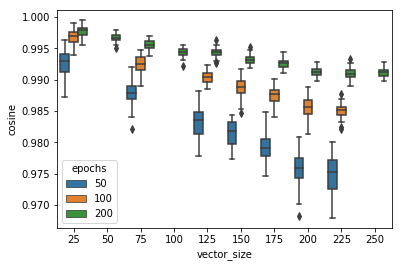

In [296]:
sns.boxplot(x='vector_size', hue='epochs', y='cosine', data=cosine_data_frame)

,vector_size,document,epochs,cosine
0,50,0,10,[[0.9676578]]
1,50,0,10,[[0.97010106]]
2,50,0,10,[[0.9720862]]
3,50,0,10,[[0.9712106]]
4,50,0,10,[[0.9738838]]
5,50,0,10,[[0.96770406]]
6,50,0,10,[[0.9664415]]
7,50,0,10,[[0.9612445]]
8,50,0,10,[[0.96032673]]
9,50,0,10,[[0.9663466]]


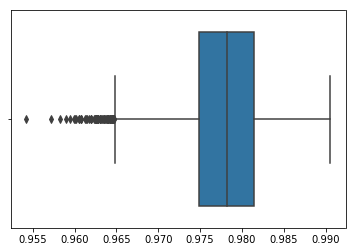

In [247]:
list_of_arrays = []

for i in range(100):
    list_of_arrays.append(model.infer_vector(simple_preprocess(topics[0]), epochs=20))

cosine_numbers = []

for vec1, vec2 in combinations(list_of_arrays, 2):
    cosine_numbers.append(cosine_similarity([vec1], [vec2]))

sns.boxplot(cosine_numbers)

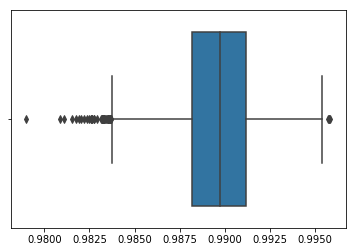

In [243]:
list_of_arrays = []

for i in range(100):
    list_of_arrays.append(model.infer_vector(simple_preprocess(topics[0]), epochs=50))

cosine_numbers = []

for vec1, vec2 in combinations(list_of_arrays, 2):
    cosine_numbers.append(cosine_similarity([vec1], [vec2]))

sns.boxplot(cosine_numbers)

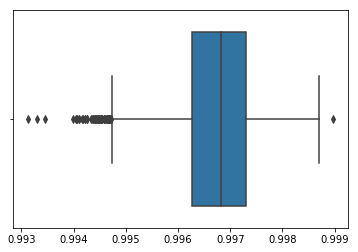

In [244]:
list_of_arrays = []

for i in range(100):
    list_of_arrays.append(model.infer_vector(simple_preprocess(topics[0]), epochs=200))

cosine_numbers = []

for vec1, vec2 in combinations(list_of_arrays, 2):
    cosine_numbers.append(cosine_similarity([vec1], [vec2]))

sns.boxplot(cosine_numbers)

In [234]:
[vec2]

[array([-2.1584649e+00, -2.4343686e+00, -6.5632123e-01,  9.6319973e-01,
         1.7146591e+00,  1.0006605e+00, -1.7444296e-01,  1.1670431e+00,
        -1.7088290e+00,  5.5822247e-01, -9.4999313e-02, -2.0626957e+00,
         5.3528875e-01, -1.4526196e+00, -1.8666151e+00,  1.6763594e+00,
         1.4133902e+00, -3.3130741e+00,  1.1484070e+00,  2.6769722e-01,
        -2.1941266e+00, -2.4711480e+00, -1.6572566e-01,  1.7506654e+00,
         2.7367008e-01,  7.5264551e-02,  5.3619987e-01, -2.0927219e+00,
         1.9853265e+00, -2.6230881e+00, -1.0135396e+00,  2.1808861e-01,
         2.2076702e+00,  1.9031648e-01, -1.7359418e+00,  6.0553414e-01,
        -9.7841299e-01, -2.5083795e+00, -2.4846799e+00, -1.5047282e+00,
        -2.2461982e+00,  2.8001532e-01,  1.1839809e+00,  7.2766978e-01,
         2.6939554e+00,  2.2153552e+00, -2.9866855e+00,  1.1284432e+00,
        -2.6358697e-01,  9.0872194e-04], dtype=float32)]

In [58]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 1h 38min 16s, sys: 1min 51s, total: 1h 40min 7s
Wall time: 18h 2min 9s


In [7]:
statement = gensim.utils.simple_preprocess('The domestic cat (Felis silvestris catus or Felis catus)[1][4] is a small, typically furry, carnivorous mammal. They are often called house cats[5] when kept as indoor pets or simply cats when there is no need to distinguish them from other felids and felines. They are often valued by humans for companionship and for their ability to hunt vermin. There are more than seventy cat breeds recognized by various cat registries.')
# statement = gensim.utils.simple_preprocess('Bouldering is a form of rock climbing that is performed on small rock formations or artificial rock walls, known as boulders, without the use of ropes or harnesses. While it can be done without any equipment, most climbers use climbing shoes to help secure footholds, chalk to keep their hands dry and provide a firmer grip, and bouldering mats to prevent injuries from falls. Unlike free solo climbing, which is also performed without ropes, bouldering problems (the sequence of moves that a climber performs to complete the climb) are usually less than 6 meters (20 ft.) tall. Traverses, which are a form of boulder problem, require the climber to climb horizontally from one end to another. [1]:3 Artificial climbing walls allow boulderers to train indoors in areas without natural boulders. In addition, Bouldering competitions take place in both indoor and outdoor settings')
# statement = gensim.utils.simple_preprocess('Wrestling is a combat sport involving grappling type techniques such as clinch fighting, throws and takedowns, joint locks, pins and other grappling holds. The sport can either be theatrical for entertainment (see professional wrestling), or genuinely competitive. A wrestling bout is a physical competition, between two (occasionally more) competitors or sparring partners, who attempt to gain and maintain a superior position. There are a wide range of styles with varying rules with both traditional historic and modern styles. Wrestling techniques have been incorporated into other martial arts as well as military hand-to-hand combat systems.')
test_vector = model.infer_vector(statement)

In [8]:
model.docvecs.most_similar([test_vector])

/home/wmvoje/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(1575, 0.4173692464828491),
 (37487, 0.3905678391456604),
 (8789, 0.38529694080352783),
 (1583, 0.3824729919433594),
 (1576, 0.3798247277736664),
 (120619, 0.37349677085876465),
 (151195, 0.36363717913627625),
 (130078, 0.36362260580062866),
 (126420, 0.3605639636516571),
 (20653, 0.3599125146865845)]

In [13]:
test = clean(test_corpus[1575])
pos_tag(test)

[('cats', 'NNS'),
 ('called', 'VBD'),
 ('cats', 'NNS'),
 ('family', 'NN'),
 ('cats', 'NNS'),
 ('domestication', 'VBP'),
 ('domesticated', 'VBN'),
 ('years', 'NNS'),
 ('pet', 'JJ'),
 ('world', 'NN'),
 ('origin', 'NN'),
 ('wildcat', 'NN'),
 ('cats', 'NNS'),
 ('kept', 'VBD'),
 ('mice', 'JJ'),
 ('job', 'NN'),
 ('farms', 'NNS'),
 ('world', 'NN'),
 ('kept', 'VBD'),
 ('companions', 'NNS'),
 ('cat', 'NN'),
 ('called', 'VBN'),
 ('cats', 'NNS'),
 ('called', 'VBD'),
 ('pussycat', 'NN'),
 ('cat', 'NN'),
 ('sex', 'NN'),
 ('organs', 'NNS'),
 ('removed', 'VBD'),
 ('called', 'VBN'),
 ('male', 'NN'),
 ('cat', 'NN'),
 ('sex', 'NN'),
 ('organs', 'NNS'),
 ('removed', 'VBD'),
 ('called', 'VBN'),
 ('tom', 'NN'),
 ('cats', 'NNS'),
 ('found', 'VBD'),
 ('hairless', 'JJ'),
 ('breeds', 'NNS'),
 ('cats', 'NNS'),
 ('breeds', 'NNS'),
 ('referred', 'VBD'),
 ('word', 'NN'),
 ('cat', 'NN'),
 ('used', 'VBN'),
 ('felines', 'NNS'),
 ('felines', 'NNS'),
 ('called', 'VBD'),
 ('either', 'CC'),
 ('cats', 'NNS'),
 ('cats', 'N

In [44]:
test_corpus[46589]

['bütgenbach',
 'or',
 'butgenbach',
 'is',
 'municipality',
 'in',
 'the',
 'belgium',
 'belgian',
 'province',
 'of',
 'liège',
 'liège',
 'in',
 'people',
 'lived',
 'there',
 'werkelijke',
 'bevolking',
 'per',
 'gemeente',
 'op',
 'januari',
 'population',
 'de',
 'droit',
 'par',
 'commune',
 'au',
 'janvier',
 'it',
 'is',
 'at',
 'north',
 'east',
 'geografische',
 'coördinaten',
 'van',
 'de',
 'gemeenten']

In [43]:
test_corpus[46586]

['büllingen',
 'or',
 'bullange',
 'is',
 'municipality',
 'in',
 'the',
 'belgium',
 'belgian',
 'province',
 'of',
 'liège',
 'liège',
 'in',
 'people',
 'lived',
 'there',
 'werkelijke',
 'bevolking',
 'per',
 'gemeente',
 'op',
 'januari',
 'population',
 'de',
 'droit',
 'par',
 'commune',
 'au',
 'janvier',
 'it',
 'is',
 'at',
 'north',
 'east',
 'geografische',
 'coördinaten',
 'van',
 'de',
 'gemeenten']

In [1]:
import pickle as p

# with open('models/simple_wiki_chunked_corpus_10_count_cutoff.p', 'wb') as topick:
#     p.dump(test_corpus, topick)

with open('models/simple_wiki_chunked_corpus_10_count_cutoff.p', 'rb') as unpick:
    test_corpus = p.load(unpick)

In [10]:
import os
import random
import codecs
from collections import defaultdict

from gensim.models.ldamodel import LdaModel as Lda
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk import pos_tag

import enchant
spelling_dict = enchant.Dict("en_US")

stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

stemmed_dict = defaultdict(set)

def stem_and_update_stem_dict(tokens):
    output_list = []
    for token in tokens:
        stemmed = stemmer.stem(token)
        if stemmed != token:
            stemmed_dict[stemmed].add(token)
        output_list.append(stemmed)
    return output_list
        
list_of_POS_to_ignore = ['WRB', 'WP$', 'WP',  'WDT', 'UH', 
                         'TO', 'RP', 'RBS', 'RB', 'RBR', 'PRP$', 'PRP', 
                        'MD', 'JJS', 'JJR', 'JJ', 'IN', 'FW', 'EX', 
                         'DT', 'CD']

# Function to remove stop words from sentences & lemmatize verbs. 
def clean(doc):
    #removing stop words 
    tokens = [i for i in doc if i not in stop]
    
    # removing pos data 
    tokens = [word for word, pos in pos_tag(tokens) if pos not in list_of_POS_to_ignore]
    # Removing improperly spelled words (pronouns must be capitalized to be spelled right)
    tokens = [word for word in tokens if spelling_dict.check(word)]
    # lowercase
    tokens = [word.lower() for word in tokens]
    # lemmatized
#     tokens = [lemma.lemmatize(word, 'v') for word in tokens]
    # removing short words 
    tokens = [s for s in tokens if len(s) > 2]
    # stemmed
#     tokens = stem_and_update_stem_dict(tokens)
    
    return tokens

In [67]:
model.save('models/simple_wiki_chunked_doc2vec_200_vector_10_min_word')

In [297]:
model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word')

# Investigating model training

In [3]:
import gensim

In [302]:
model.workers = 4

In [303]:
model.workers

4

In [304]:
model.total_train_time

2444.668396513989

In [307]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=9)

CPU times: user 23min 44s, sys: 40.5 s, total: 24min 24s
Wall time: 9min 19s


In [308]:
model.total_train_time

3058.171780727018

In [309]:
model.save('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_50epochs')

In [310]:
model.vector_size

300

In [311]:
epochs = 50 

while epochs < 100:
    epochs += 1
    model.train(train_corpus, total_examples=model.corpus_count, epochs=1)
    model.save('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epochs) + 'epochs')
    print(epochs)

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


# looking at how vectors change with epochs

In [32]:
import gensim
import pandas as pd

In [28]:
list_of_documents_to_test = list(range(10))

from collections import defaultdict

dict_of_arrays = defaultdict(list)

for epoch in list(range(50, 101, 3)):
    filname = 'models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epoch) + 'epochs'
    model = gensim.models.Doc2Vec.load(filname)
    for doc in list_of_documents_to_test:
        dict_of_arrays[doc].append(model.docvecs[doc])
    


In [41]:
test = pd.DataFrame(columns=['epoch', 'cosine'])

array_index = 0
for epoch, i in zip(list(range(50, 101, 3)), dict_of_arrays[9]):
    print(cosine_similarity([dict_of_arrays[9][0]], [i]))
    test.loc[array_index] = [epoch, float(cosine_similarity([dict_of_arrays[9][0]], [i]))]
    array_index += 1

[[1.]]
[[0.9952266]]
[[0.9891814]]
[[0.98475707]]
[[0.9832585]]
[[0.9789617]]
[[0.97666264]]
[[0.972366]]
[[0.968732]]
[[0.96397537]]
[[0.96265674]]
[[0.95888954]]
[[0.9557454]]
[[0.9526125]]
[[0.9497739]]
[[0.9478444]]
[[0.9438855]]


In [42]:
test

,epoch,cosine
0,50.0,1.000000
1,53.0,0.995227
2,56.0,0.989181
3,59.0,0.984757
4,62.0,0.983258
5,65.0,0.978962
6,68.0,0.976663
7,71.0,0.972366
8,74.0,0.968732
9,77.0,0.963975


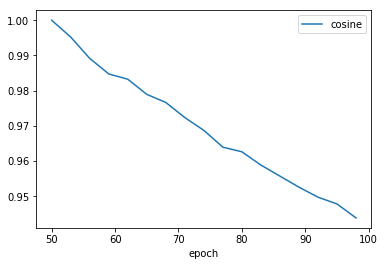

In [43]:
test.plot(x='epoch', y='cosine')

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
document_item = 14

list_to_print = []
for item1, item2 in list(zip(dict_of_arrays[document_item],dict_of_arrays[document_item][1:])):
    print(cosine_similarity([item1], [item2]))
    list_to_print.append(float(cosine_similarity([item1], [item2])))

[[0.990417]]
[[0.9903075]]
[[0.99180174]]
[[0.9945694]]
[[0.99360144]]
[[0.9950986]]
[[0.9943913]]
[[0.9958112]]
[[0.99636346]]
[[0.99647355]]


In [23]:
import seaborn as sns
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

In [ ]:
plt

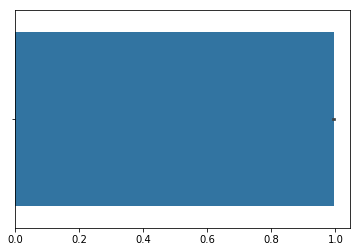

In [25]:
sns.barplot(list_to_print)

In [11]:
import gensim

In [12]:
model = gensim.models.Doc2Vec.load('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_100epochs')
model.workers = 4

In [13]:
epochs = 100 

while epochs < 200:
    epochs += 10
    model.train(train_corpus, total_examples=model.corpus_count, epochs=10)
    model.save('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epochs) + 'epochs')
    print(epochs)

110
120
130
140
150
160
170
180
190
200


In [14]:
while epochs < 1000:
    epochs += 50
    model.train(train_corpus, total_examples=model.corpus_count, epochs=50)
    model.save('models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epochs) + 'epochs')
    print(epochs)

250
300
350
400
450
500
550
600
650
700
750
800
850


KeyboardInterrupt: 

In [1]:
import gensim

In [2]:
# epochs_list = ['']

# list_of_documents_to_test = list(range(10))

# from collections import defaultdict

# dict_of_arrays = defaultdict(list)

# for epoch in list(range(50, 101, 3)):
#     filname = 'models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epoch) + 'epochs'
#     model = gensim.models.Doc2Vec.load(filname)
#     for doc in list_of_documents_to_test:
#         dict_of_arrays[doc].append(model.docvecs[doc])
    

In [2]:
import numpy as np

In [16]:
epochs_list = ['']
epochs_list = []
epochs_list.extend(list(range(50, 101)))
epochs_list.extend(list(range(100, 851, 50)))

list_of_documents_to_test = list(range(10))

from collections import defaultdict

# dict_of_arrays = defaultdict(list)
output = None


for epoch in epochs_list:
    filname = 'models/simple_wiki_chunked_doc2vec_300_vector_10_min_word_'+str(epoch) + 'epochs'
    model = gensim.models.Doc2Vec.load(filname)
    for doc in [10]:
        if output is not None:
            try:
                output = np.append([output], [model.docvecs[doc]], axis=0)
            except:
                output = np.append(output, [model.docvecs[doc]], axis=0)
        else:
            output = np.array(model.docvecs[doc])
#         output.append(model.docvecs[doc])
    del model

In [20]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
test = pd.DataFrame(columns=['epoch', 'cosine'])

array_index = 0
for epoch, i in zip(epochs_list, output):
    print(cosine_similarity([output[0]], [i]))
    test.loc[array_index] = [epoch, float(cosine_similarity([output[0]], [i]))]
    array_index += 1

[[0.9999999]]
[[0.99800295]]
[[0.9966716]]
[[0.9948083]]
[[0.9946049]]
[[0.99237365]]
[[0.9893937]]
[[0.9899368]]
[[0.9886581]]
[[0.98773706]]
[[0.9865179]]
[[0.986983]]
[[0.9855287]]
[[0.9843553]]
[[0.9835083]]
[[0.98159224]]
[[0.98158085]]
[[0.9806148]]
[[0.9795971]]
[[0.9774846]]
[[0.97732246]]
[[0.9756546]]
[[0.97369456]]
[[0.9734365]]
[[0.97264814]]
[[0.9714664]]
[[0.97075444]]
[[0.9707972]]
[[0.9693209]]
[[0.9675426]]
[[0.9674686]]
[[0.9665442]]
[[0.9641351]]
[[0.9617697]]
[[0.9599803]]
[[0.9575818]]
[[0.9578228]]
[[0.95575124]]
[[0.9545353]]
[[0.9558728]]
[[0.9559883]]
[[0.9536794]]
[[0.9540061]]
[[0.9519363]]
[[0.9518798]]
[[0.95321715]]
[[0.9503181]]
[[0.9499104]]
[[0.951043]]
[[0.9501809]]
[[0.95146835]]
[[0.95146835]]
[[0.9365027]]
[[0.9299035]]
[[0.92287934]]
[[0.91481274]]
[[0.89977175]]
[[0.89308167]]
[[0.8877939]]
[[0.87942684]]
[[0.8758034]]
[[0.86993694]]
[[0.86232036]]
[[0.85841787]]
[[0.8497493]]
[[0.84622085]]
[[0.8421024]]


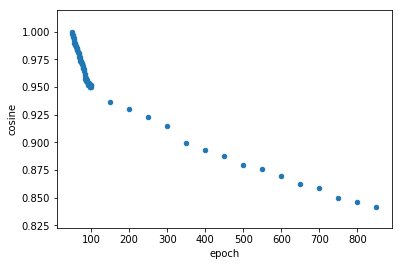

In [30]:
%matplotlib inline
import seaborn as sns
test.plot.scatter(x='epoch', y='cosine')

[array([-0.09873271, -0.38445738, -0.11841913,  0.15415132, -0.6523824 ,
         0.11224592, -0.35974038, -0.24351221, -0.94710666, -0.22751893,
         0.10789845, -0.698158  ,  0.6245654 ,  0.00511736,  0.9365074 ,
         0.5034717 ,  1.1449183 ,  0.0580245 ,  0.6188839 , -0.3746723 ,
        -0.59429264, -0.4119914 , -0.7838709 ,  0.12741818,  0.743559  ,
        -0.2930218 , -0.254785  ,  0.20689121,  0.06806126, -1.2452523 ,
        -0.14102378, -0.01871628,  0.12427453,  0.8795282 ,  0.4701037 ,
         0.00315543,  0.18903306, -0.57624084,  0.05506678, -0.14503291,
         0.10938947,  0.41105354,  0.5317753 , -0.06573683, -0.6465584 ,
         0.84541434,  0.6550027 ,  0.08956805, -0.09003133, -0.2111553 ,
         0.04252867, -0.7158433 ,  0.13249995,  0.7015682 , -0.5330992 ,
         0.65194   , -0.10077243, -0.35465536,  0.00540563,  0.10988909,
        -0.22945848,  0.14482212, -0.1740423 , -0.1290046 , -1.3902265 ,
        -0.3759748 ,  1.7233386 , -0.00926691, -0.1